In [229]:
import importlib
import models
importlib.reload(models)

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median

In [230]:
df = pd.read_excel("model_one_results.xlsx", sheet_name="5.4", skiprows=2)

In [231]:
def max_degree(G):
    # Initialize max_degree
    max_degree = -1

    # Iterate over all nodes and their degrees
    for degree in G.degree():
        if degree[1] > max_degree:
            max_degree = degree[1]
    
    return max_degree

# Model One

In [232]:
# Check if planar and connected
planar = []
connected = []
median_deg = []
max_deg = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    base = int(row["prob_base_num"])
    G = models.model_one(n, rs, base)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_one_df = df.assign(planar=planar, connected=connected, median_deg=median_deg, max_deg=max_deg)

In [233]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_one_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = columns_avg.to_frame(name = "Model 1")

## Visualize Graphs

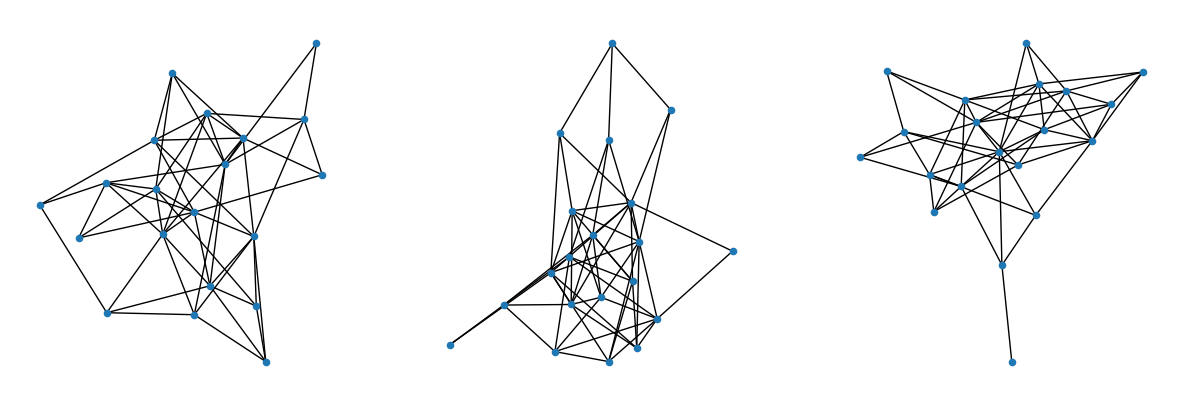

In [234]:
# Create graphs with 20 vertices
G1 = models.model_one(20, 13, 18)
G2 = models.model_one(20, 47, 25)
G3 = models.model_one(20, 50, 26)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

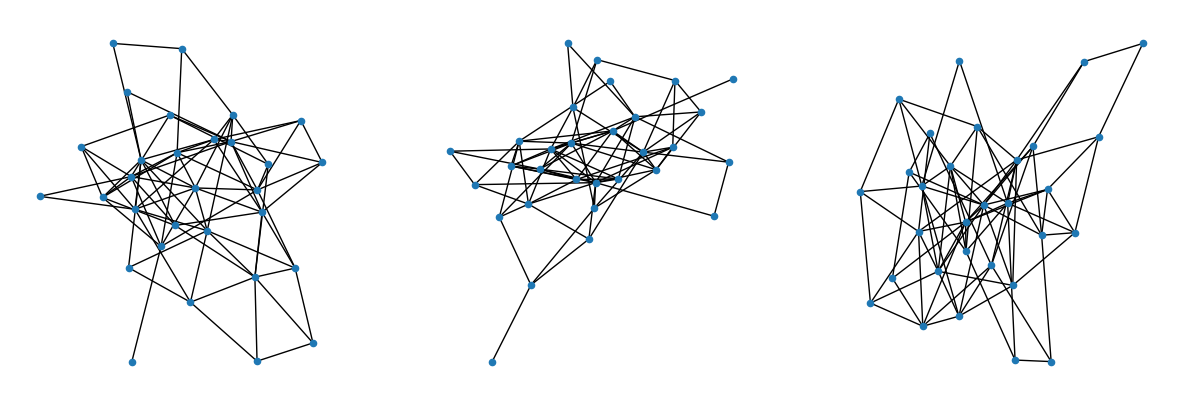

In [235]:
# Create graphs with 30 vertices
G1 = models.model_one(30, 13, 85)
G2 = models.model_one(30, 47, 135)
G3 = models.model_one(30, 50, 60)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

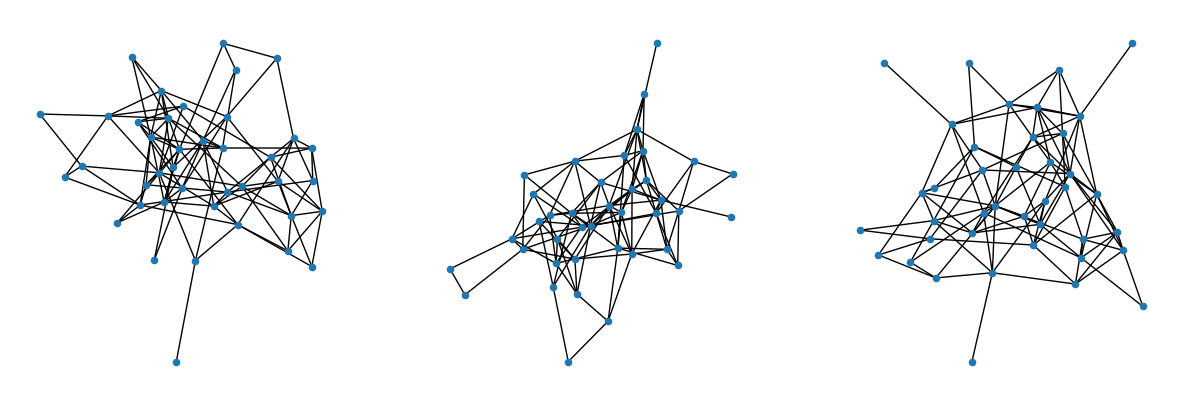

In [236]:
# Create graphs with 40 vertices
G1 = models.model_one(40, 13, 180)
G2 = models.model_one(40, 47, 360)
G3 = models.model_one(40, 50, 103)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

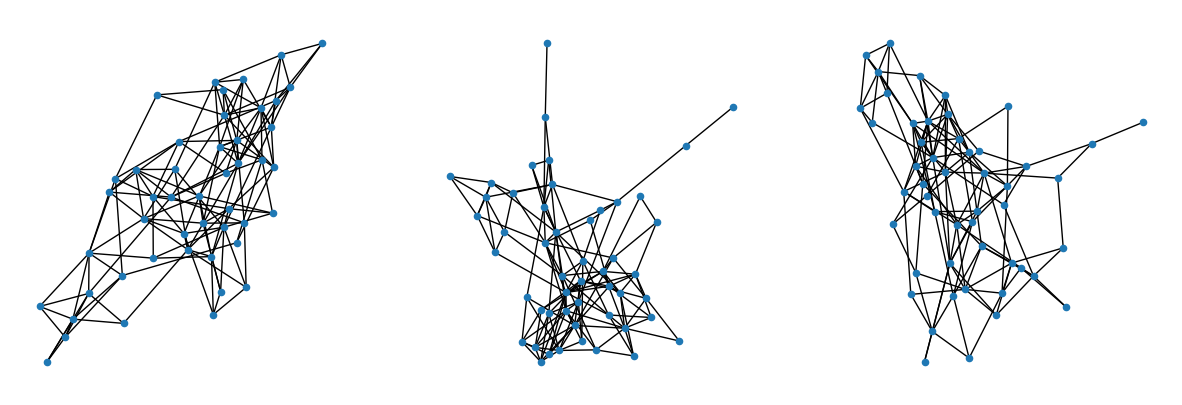

In [237]:
# Create graphs with 50 vertices
G1 = models.model_one(50, 13, 660)
G2 = models.model_one(50, 47, 340)
G3 = models.model_one(50, 50, 429)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: Graphs are not planar, but most are connected although some aren't.

# Update Dataframe for Models Two and Three

First, we just need the number of vertices and random seed. Then, we will add larger number of vertices so that we can run more trials and explore the graphs created by these models when there are more vertices.

In [258]:
new_df = df[["num_vertices", "rand_seed"]].drop_duplicates()

new_vert = [200, 400, 600] #, 800] # , 10000, 12000, 14000, 16000, 18000, 20000, 25000]
for seed in df["rand_seed"].unique()[0:3]:
    for vert in new_vert:
        new_row = pd.DataFrame([{'num_vertices': vert, 'rand_seed': seed}])
        new_df = pd.concat([new_df, new_row], ignore_index=True)

# Model Two

In [259]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in new_df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_two(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_two_df = new_df.assign(planar=planar, connected=connected, 
                             avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [260]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_two_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 2')], axis=1)

## Visualize Graphs

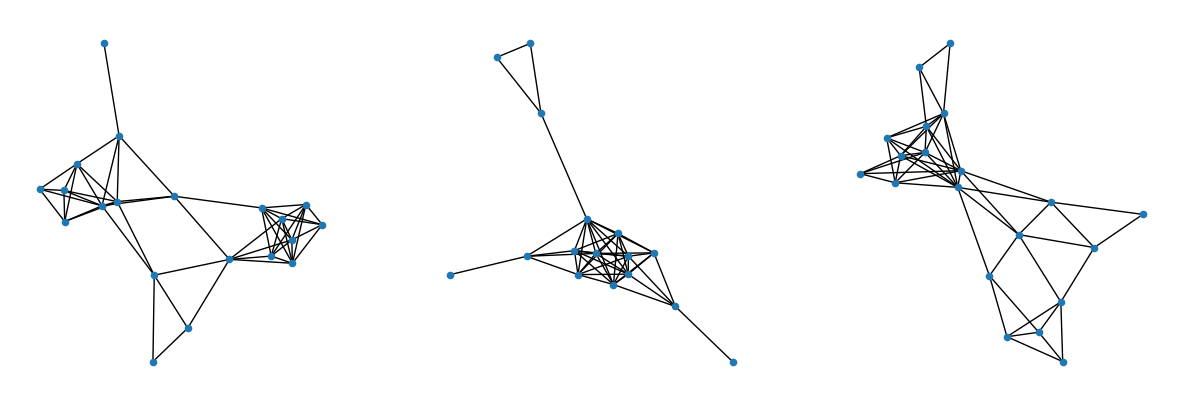

In [261]:
# Create graphs with 20 vertices
G1 = models.model_two(20, 13)
G2 = models.model_two(20, 47)
G3 = models.model_two(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

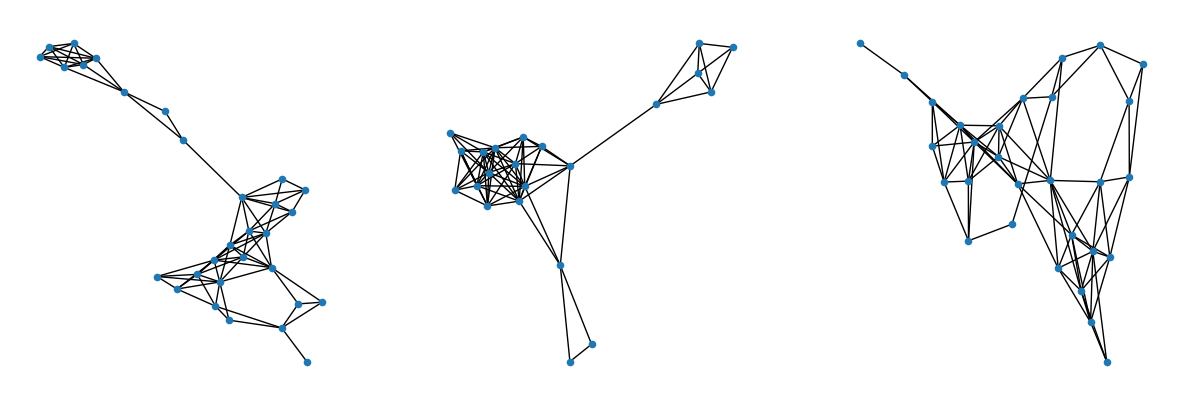

In [262]:
# Create graphs with 30 vertices
G1 = models.model_two(30, 13)
G2 = models.model_two(30, 47)
G3 = models.model_two(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

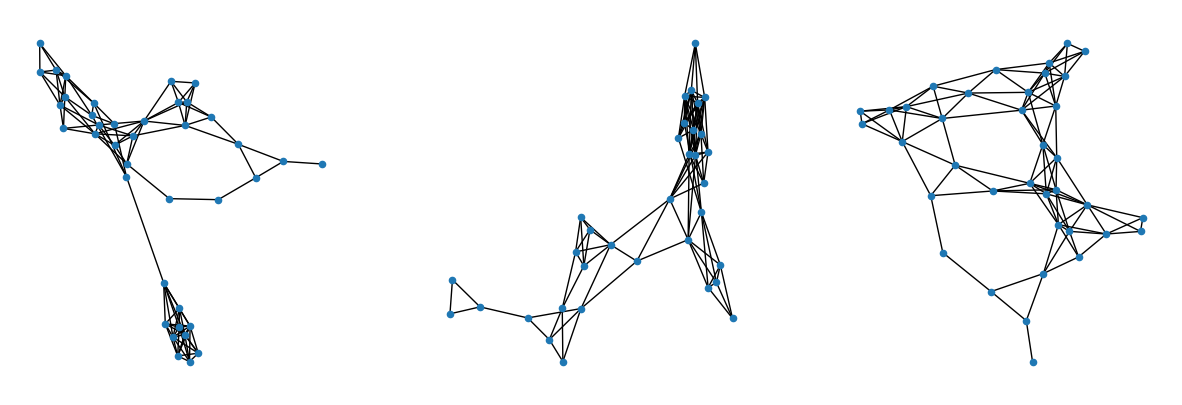

In [263]:
# Create graphs with 40 vertices
G1 = models.model_two(40, 13)
G2 = models.model_two(40, 47)
G3 = models.model_two(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

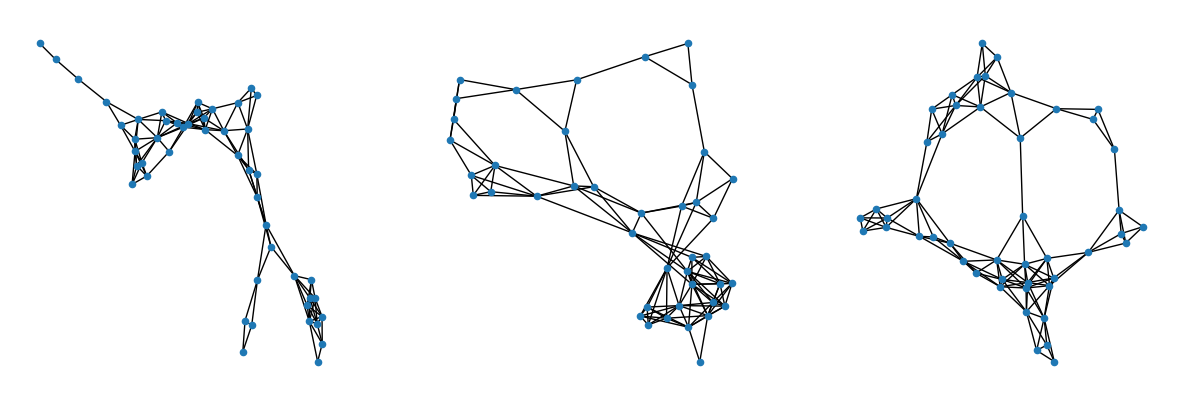

In [264]:
# Create graphs with 50 vertices
G1 = models.model_two(50, 13)
G2 = models.model_two(50, 47)
G3 = models.model_two(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

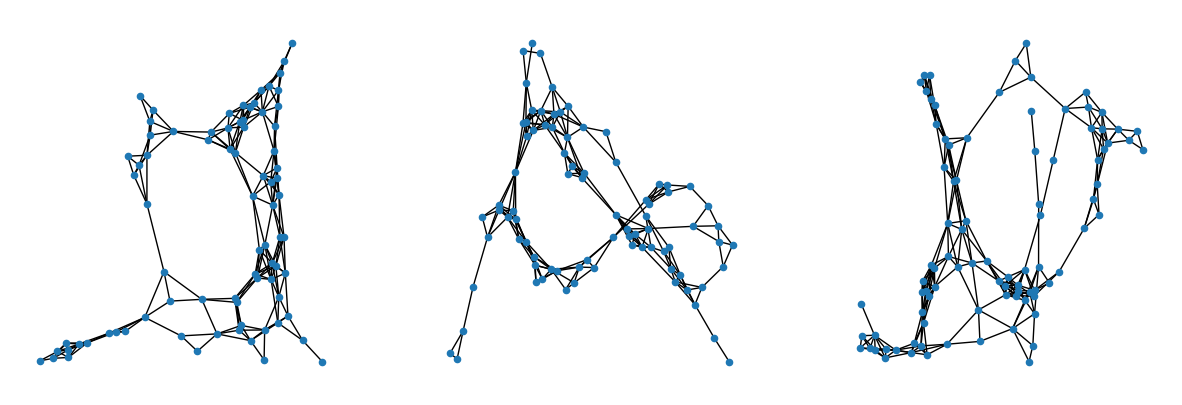

In [265]:
# Create graphs with 100 vertices
G1 = models.model_two(100, 13)
G2 = models.model_two(100, 47)
G3 = models.model_two(100, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: None are planar and one is not connected. Random seed 23 with 40 vertices. Althought it seems like there are too many edges, but I'm not sure.

# Model Three

In [266]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in new_df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_three(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_three_df = new_df.assign(planar=planar, connected=connected, 
                               avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [267]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_three_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 3')], axis=1)

## Visualize Graphs

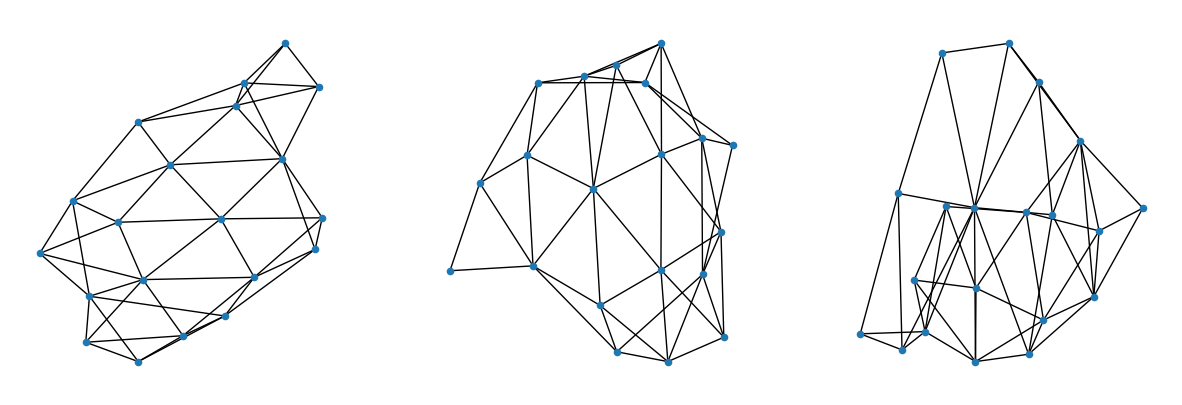

In [268]:
# Create graphs with 20 vertices
G1 = models.model_three(20, 13)
G2 = models.model_three(20, 47)
G3 = models.model_three(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

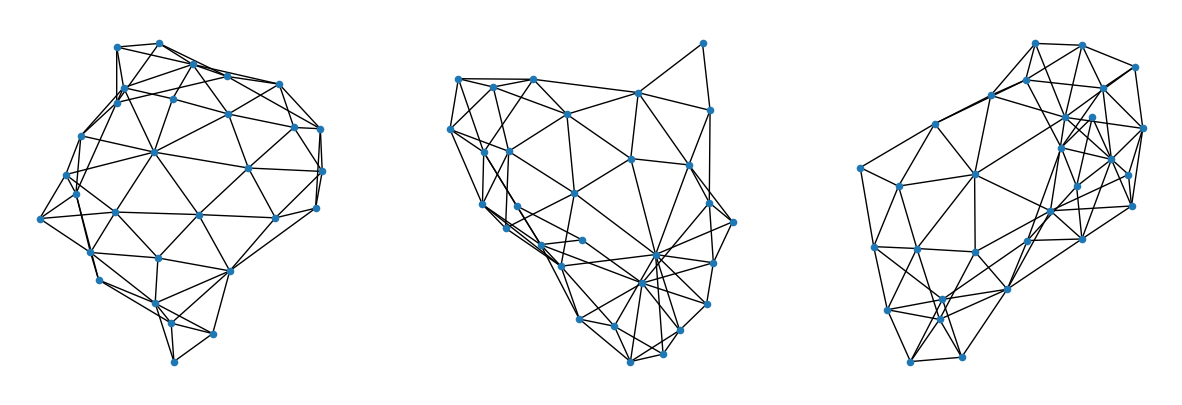

In [269]:
# Create graphs with 30 vertices
G1 = models.model_three(30, 13)
G2 = models.model_three(30, 47)
G3 = models.model_three(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

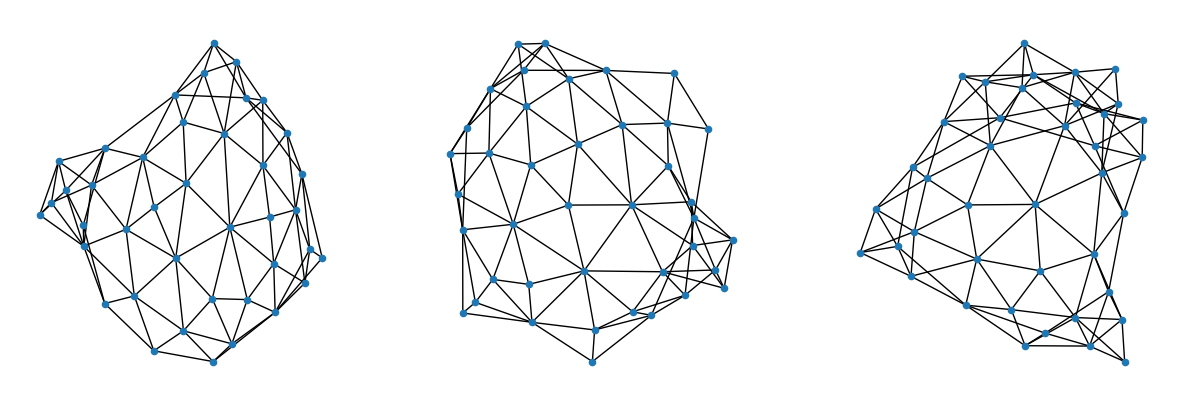

In [270]:
# Create graphs with 40 vertices
G1 = models.model_three(40, 13)
G2 = models.model_three(40, 47)
G3 = models.model_three(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

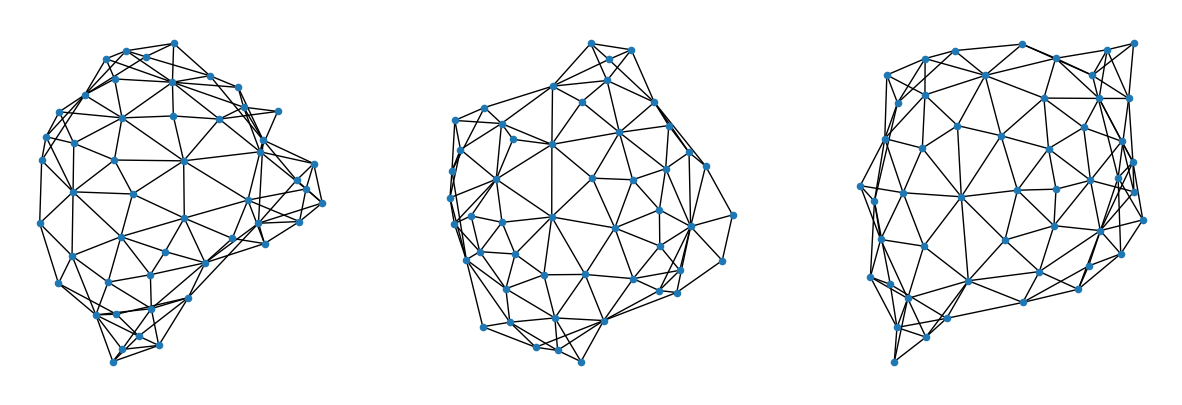

In [271]:
# Create graphs with 50 vertices
G1 = models.model_three(50, 13)
G2 = models.model_three(50, 47)
G3 = models.model_three(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

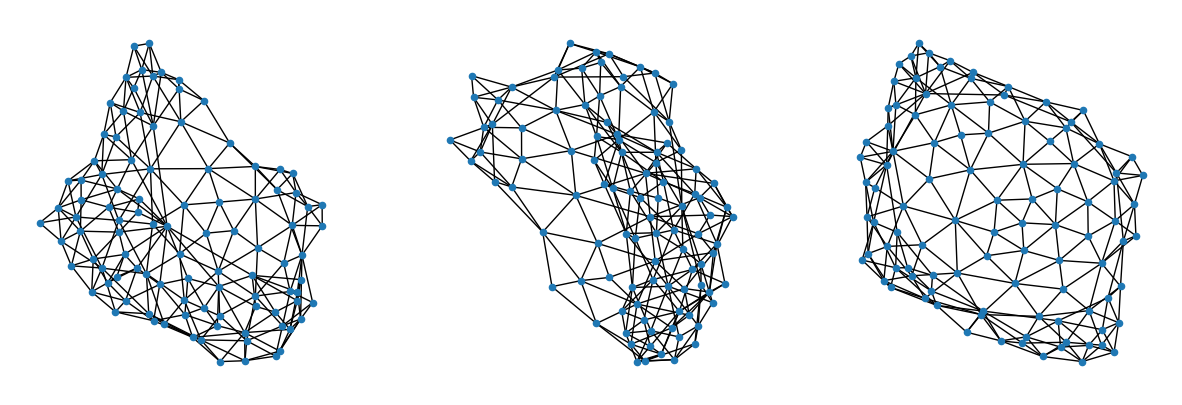

In [272]:
# Create graphs with 100 vertices
G1 = models.model_three(100, 13)
G2 = models.model_three(100, 47)
G3 = models.model_three(100, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: All are planar and connected.

# Model 4

Delaunay Triangulation (Model 3) with random edges removed

In [273]:
# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in new_df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_three_with_removal(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_four_df = new_df.assign(planar=planar, connected=connected, 
                               avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [274]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_four_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 4')], axis=1)

Too small average degree and median degree. Max degree is also small, but it is always planar and connected.

# Compare Model Averages

In [276]:
model_avgs

,Model 1,Model 2,Model 3,Model 4,Model 2,Model 3,Model 4
planar,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
connected,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
avg_deg,5.399487,5.620905,5.405163,3.512781,5.618632,5.441477,3.532242
median_deg,5.192308,5.463415,5.365854,3.487805,5.477273,5.409091,3.522727
max_deg,11.102564,10.463415,8.902439,6.853659,10.659091,9.068182,6.954545
